In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from src.utils.kaggle import read_data_set

df = read_data_set("data/raw/insurance.csv")
print(df.shape)

(1338, 7)


## Dataset Characteristics

| Feature     | Definition                                                                                 | Unit                     |
| ----------- | ------------------------------------------------------------------------------------------ | ------------------------ |
| age         | age of primary beneficiary                                                                 | int64                    |
| sex         | insurance contractor gender                                                                | object (female and male) |
| bmi         | Body mass index, ideally 18.5 to 24.9                                                      | float64                  |
| children    | Number of children covered by health insurance / Number of dependents                      | int64                    |
| smoker      | Smoking status                                                                             | object (yes, no)         |
| region      | the beneficiary's residential area in the US, [northeast, southeast, southwest, northwest] | object                   |
| **charges** | **Individual medical costs billed by health insurance**                                    | **float64**              |

[Source](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)


In [2]:
df.info()
target_col = "charges"
categorical_cols = df.select_dtypes(object).columns.tolist()
quantitative_cols = [col for col in df.columns.tolist() if col not in categorical_cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Missing value


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Duplicate values


In [4]:
df.duplicated().sum()

np.int64(1)

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Split test and data


In [6]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
print(train_data.shape, test_data.shape)

(935, 7) (402, 7)


## EDA


Plot categorical features against target column


<Figure size 640x480 with 0 Axes>

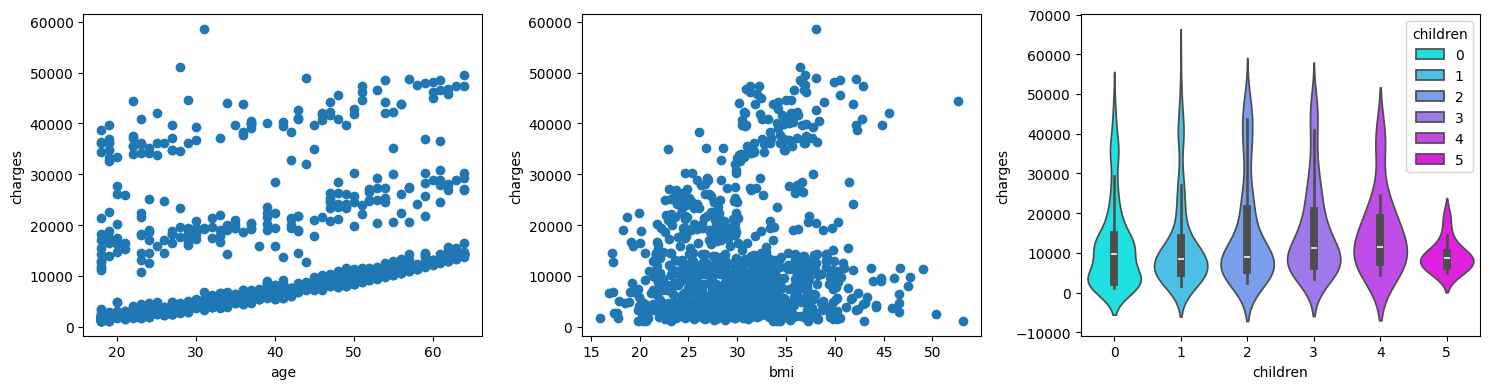

<Figure size 640x480 with 0 Axes>

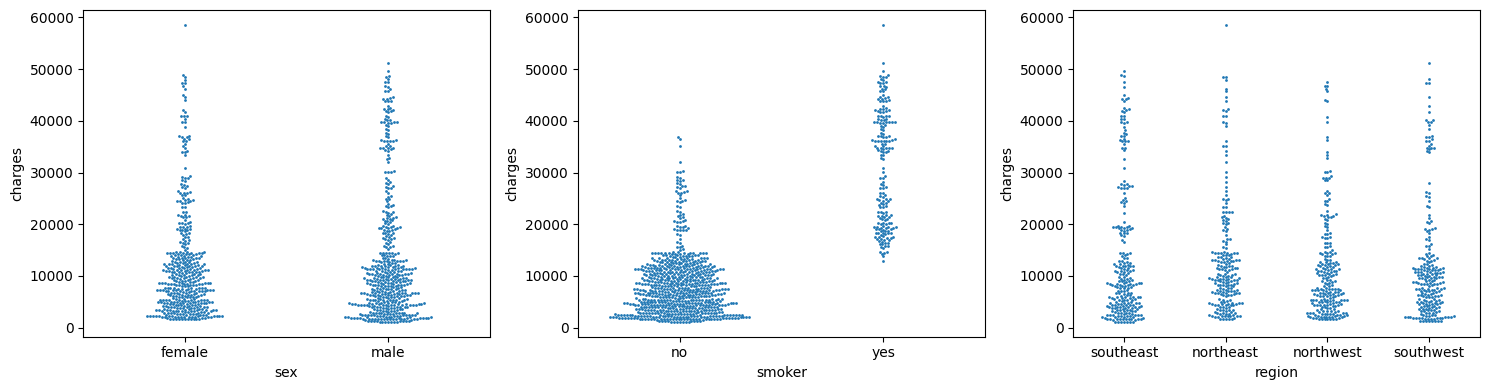

In [21]:
features = [feature for feature in quantitative_cols if feature != target_col]
cols = 3
rows = math.ceil(len(features) / cols)
plt.figure()
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    if feature == "children":
        sns.violinplot(
            data=train_data, x=feature, y=target_col, palette="cool", ax=ax, hue=feature
        )
    else:
        ax.scatter(train_data[feature], train_data[target_col])
    ax.set_xlabel(feature)
    ax.set_ylabel(target_col)

plt.tight_layout()
plt.show()

plt.figure()
features = [feature for feature in categorical_cols]
cols = 3
rows = math.ceil(len(features) / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    # swarm for categorical
    sns.swarmplot(x=train_data[feature], y=train_data[target_col], ax=ax, s=2)
    ax.set_xlabel(feature)
    ax.set_ylabel(target_col)

plt.tight_layout()
plt.show()

Plot categorical features against target column

<Figure size 640x480 with 0 Axes>

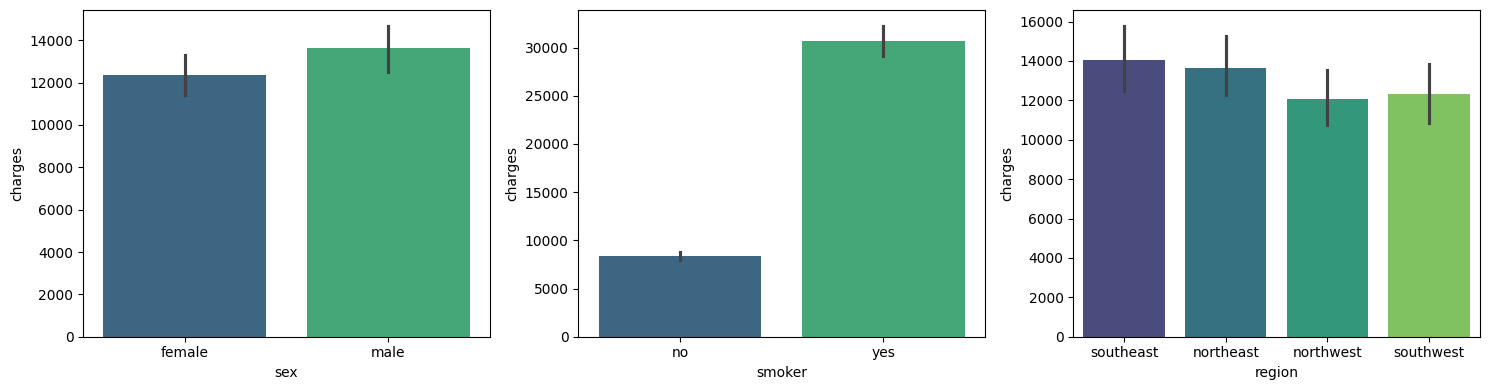

In [13]:
plt.figure()
features = [feature for feature in categorical_cols if feature != target_col]
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.barplot(
        data=train_data,
        x=feature,
        y="charges",
        errorbar="ci",
        palette="viridis",
        hue=feature,
        ax=ax,
    )
    ax.set_xlabel(feature)
    ax.set_ylabel(target_col)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

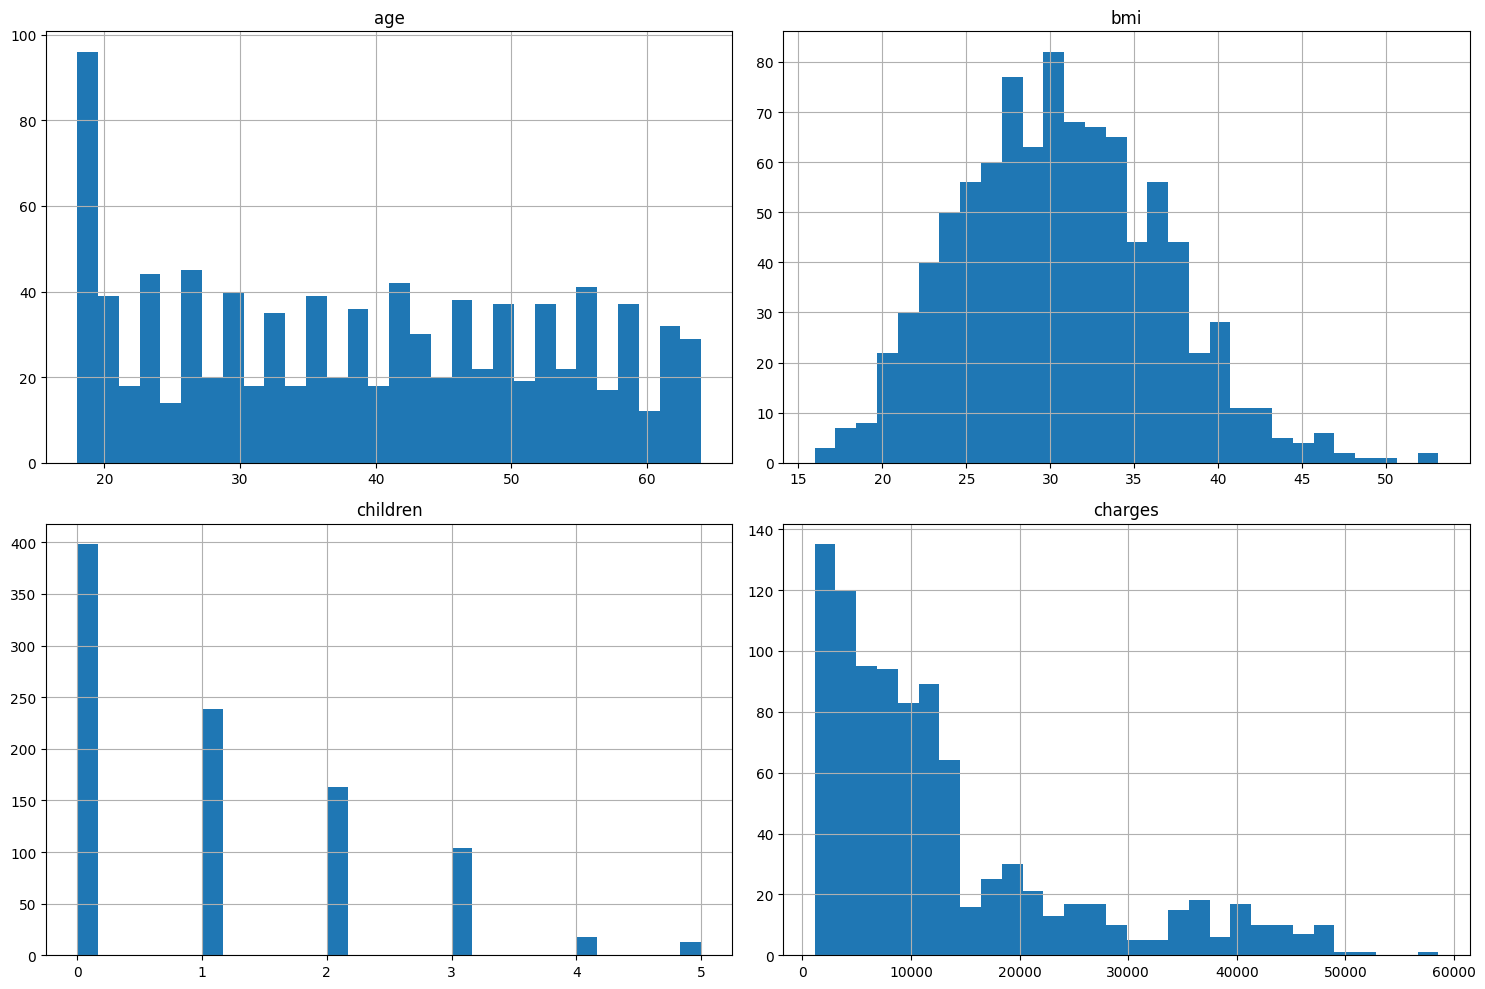

<Figure size 640x480 with 0 Axes>

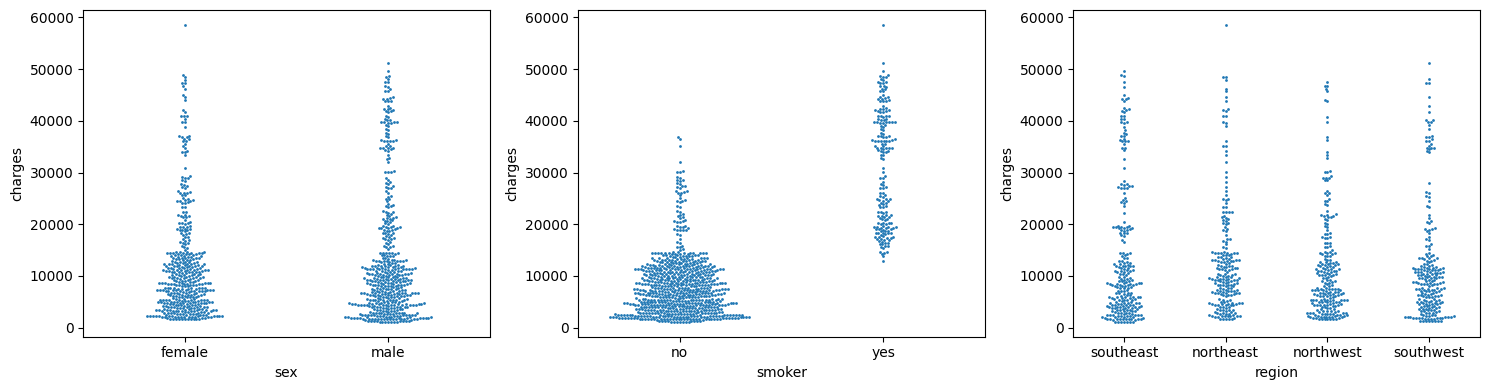

In [ ]:
# histogram
plt.figure()
train_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()